In [5]:
# imports
import sqlite3
from sqlite3 import Error
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.animation import FuncAnimation
from functools import partial
import itertools
import matplotlib.animation as animation
import os
from IPython.display import clear_output

# Create database connection

In [1]:
def createConnection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
    
    return conn

# Select Highest ID Row

In [48]:
def selectHighest(conn, tableName):
    """
    Query tasks by priority
    :param conn: the Connection object
    :param priority:
    :return:
    """
    cur = conn.cursor()
    cur.execute(
        f"""SELECT * FROM {tableName} WHERE id=(
            SELECT max(id) FROM {tableName}
        )"""
    )

    row = np.array(cur.fetchall()[0])

    return int(row[0])

# Select Nth datapoint

In [61]:
def getNthDatapoint(conn, n, tableName):
    """
    Query tasks by priority
    :param conn: the Connection object
    :param priority:
    :return:
    """
    cur = conn.cursor()
    cur.execute(
        f"""SELECT * FROM {tableName} WHERE id={n}"""
    )

    row = np.array(cur.fetchall()[0])

    return [row[1], row[2], row[3]]

In [62]:
def getNDatapoints(n, amountVectors):

    database = r"./database/data.db"

    tableName = f"data{amountVectors}Vectors"

    # create a database connection
    conn = createConnection(database)

    if conn is not None:

        max = selectHighest(conn, tableName)

        sampleIndeces = random.sample(range(1, max+1), n)

        sampleList = []
        for n in sampleIndeces:
            sampleList.append(getNthDatapoint(conn, n, tableName))

        return sampleList

    else:
        print("Error! cannot create the database connection.")

In [102]:
def stringToPointsArray(string):
    string = string[1:-1]
    string = string.split("], [")

    stringArray = []
    for s in string:
        if(s[0] == "["):
            s = s[1:]
        if(s[-1] == "]"):
            s = s[:-1]
        # print(s)
        stringArray.append(np.array([float(x) for x in s.split(", ")]))

    return stringArray

[[-7.026922827722537, 4.425887380877228], [-8.318601578870352, 4.37267441632924], [-9.589498352248212, 4.352334131860273], [-10.823313416916035, 4.368690350924074], [-12.003409489408753, 4.424460108963214], [-13.113019566983626, 4.521159642944132], [-14.135466163341166, 4.659031663445804], [-15.054388706653292, 4.836995791074784], [-15.853975620356223, 5.052623636430646], [-16.51919742555117, 5.302139566344972], [-17.036037084304922, 5.580447736408825], [-17.391713748868767, 5.881185489200347], [-17.57489609488821, 6.196802727858362], [-17.57590149789885, 6.518666384705242], [-17.38687746139631, 6.837188623590937], [-17.001961919890274, 7.141976951515657], [-16.4174193187372, 7.422003978663069], [-15.631749710142936, 7.665794164602524], [-14.645768496362468, 7.861624529896667], [-13.46265489059007, 7.997736003772654], [-12.08796764618548, 8.062551826118918], [-10.5296271177631, 8.044899231130106], [-8.797863254652757, 7.9342305146338346], [-6.9051296791644035, 7.720839530535724], [-4.8

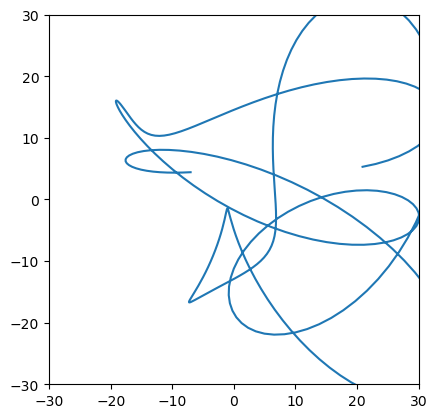

In [138]:
amountVectors = 10

sampleList = getNDatapoints(1, 5)

print(sampleList[0][0])

pointsString = sampleList[0][0]

points = np.array(stringToPointsArray(pointsString))

size = 30
ax = plt.gca()
plt.axis([-size, size, -size, size])
ax.set_aspect('equal', adjustable='box')
plt.plot(points[:,0], points[:,1]);